<a href="https://colab.research.google.com/github/tusharthakurepc1/DataSample/blob/master/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
players = pd.read_csv("https://raw.githubusercontent.com/tusharthakurepc1/DataSample/master/Players.csv")
matches = pd.read_csv("https://raw.githubusercontent.com/tusharthakurepc1/DataSample/master/matches.csv")
innings = pd.read_csv("https://raw.githubusercontent.com/tusharthakurepc1/DataSample/master/deliveries.csv")
teams = pd.read_csv("https://raw.githubusercontent.com/tusharthakurepc1/DataSample/master/teams.csv")
deliveries = pd.read_csv("https://raw.githubusercontent.com/tusharthakurepc1/DataSample/master/deliveries.csv")

**Q1**

In [179]:
newData = matches.groupby('venue').size()
print(type(newData))
newData = newData.reset_index()
newData.columns = ['venue', 'count']


<class 'pandas.core.series.Series'>


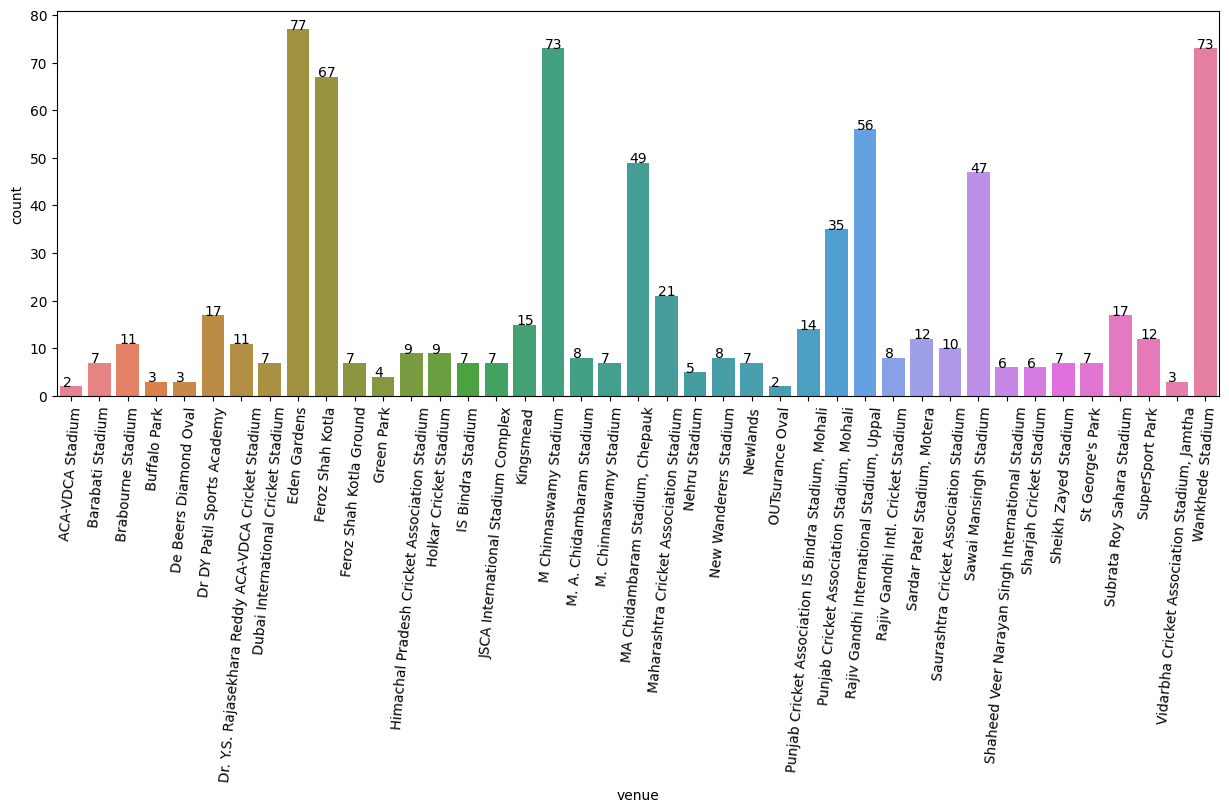

In [180]:
#seaborn
fig = plt.figure(figsize=(15, 5))
sns.barplot(x=newData['venue'], y= newData['count'], hue=newData['venue'], data = newData)

for index, value in enumerate(newData['count']):
    plt.text(index - 0.3, value, str(value))

plt.xticks(rotation = 85)
plt.show()

**Q2**

In [175]:
dataFrame = players.fillna({'Country': "Others"})

newData = dataFrame.groupby('Country').size().reset_index().sort_values(['Country'])
newData.columns = ['Country', 'count']

newData['count'].sort_values()

4       1
11      2
1       5
7      13
2      14
10     19
9      20
5      22
8      39
0      72
6      95
3     264
Name: count, dtype: int64

Text(0.5, 1.0, 'Players Distribution')

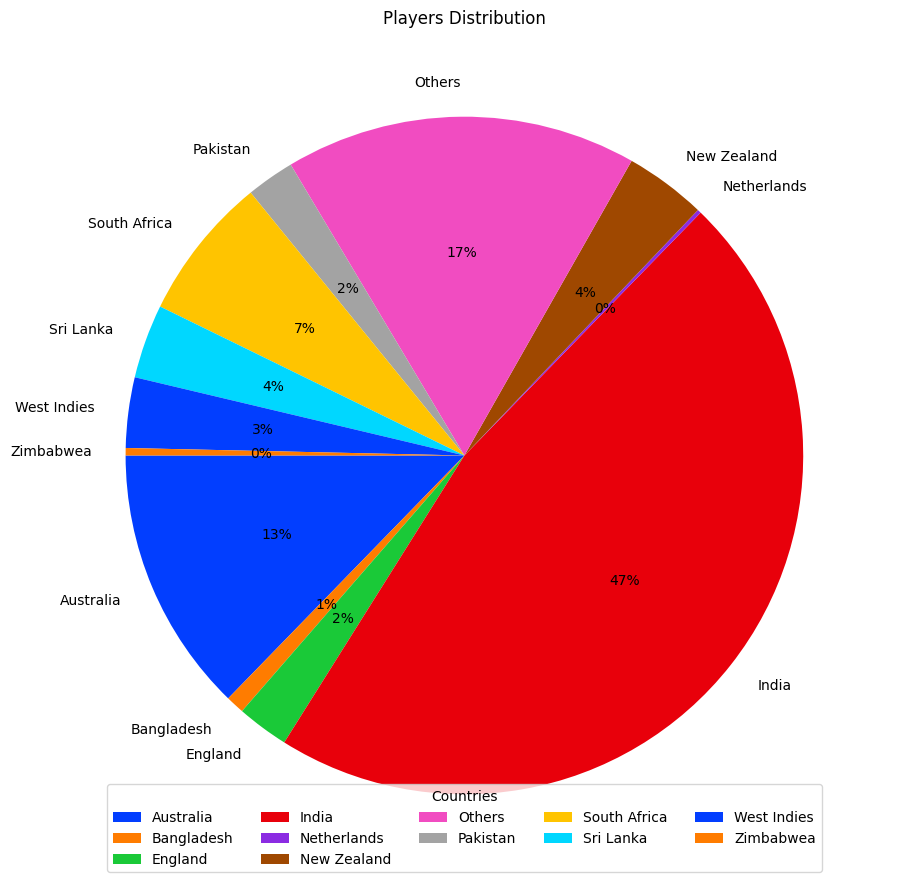

In [177]:
plt.figure(figsize=(11,11))
seaborn_colors = sns.color_palette('bright')

plt.pie(newData['count'], labels=newData['Country'], colors = seaborn_colors, startangle=180, autopct='%1.0f%%')

plt.legend(title="Countries", loc="lower center", ncol=5)
plt.title("Players Distribution")

**Q3**

In [159]:
innings[['match_id', 'inning', 'over']].head()

,match_id,inning,over
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


**Average Run Rate**

In [160]:
totalRuns = innings.groupby(['match_id', 'inning', 'over'])['total_runs'].sum()
totalRuns

print(type(totalRuns))
totalRuns[(1, 1, 3)]

match_id = 1       #match_id input
inning = 2          #inning input

totalRunInMatch = 0
# for i in range(1, 21, 1):                             #calculate the total run in the match
#   totalRunInMatch += totalRuns[(match_id, inning, i)];

avgRunRate = []

for i in range(1, 21, 1):
  totalRunInMatch += totalRuns[(match_id, inning, i)];

  avgRunInOver = totalRunInMatch / i
  avgRunRate.append(float(format(avgRunInOver, ".2f")))


overs = np.arange(1, 21)

df = pd.DataFrame([overs, avgRunRate])
df = df.T
df.columns = ['overs', 'avgRunRate']


<class 'pandas.core.series.Series'>


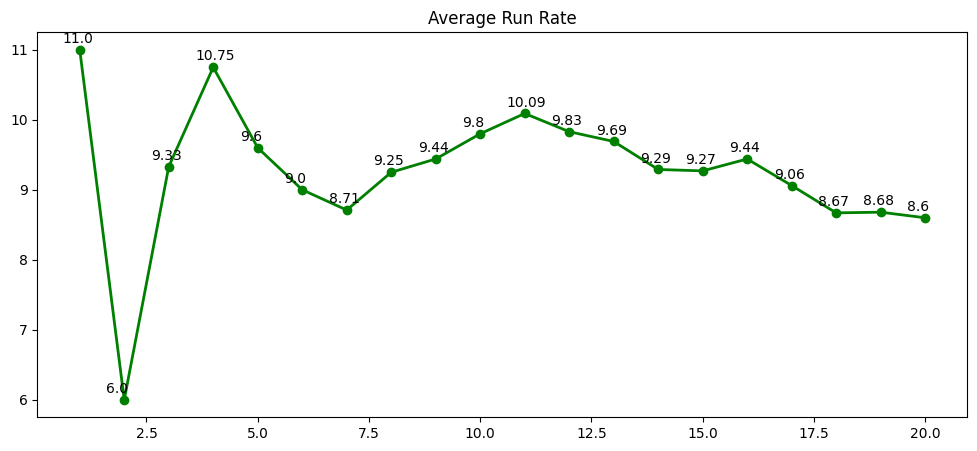

In [161]:
fig = plt.figure(figsize = (12, 5))
plt.plot(overs, avgRunRate, 'go-', linewidth=2);

for i, v in enumerate(avgRunRate):
  plt.text(i+0.6, v+0.1,str(v))


plt.title("Average Run Rate")
plt.show()

**Q4**

In [162]:
matches[['team1', 'team2', 'winner']]
print(len(matches))

def getLostTeam(team1, team2, winner):
  if team1 == winner:
    return team2
  else:
    return team1

matches['teamLost'] = matches.apply(lambda x: getLostTeam(x.team1, x.team2, x.winner), axis=1)    #make a column for lost team
matches[['team1', 'team2', 'winner', 'teamLost']]
print(len(matches))

winData = matches.groupby(['winner']).size().reset_index()
winData.columns = ['team', 'winn_count']
lossData = matches.groupby(['teamLost']).size().reset_index()
lossData.columns = ['team', 'loss_count']

print(len(winData), len(lossData))
winData = winData.merge(lossData)
winData


756
756
15 15


,team,winn_count,loss_count
0,Chennai Super Kings,100,64
1,Deccan Chargers,29,46
2,Delhi Capitals,10,6
3,Delhi Daredevils,67,94
4,Gujarat Lions,13,17
5,Kings XI Punjab,82,94
6,Kochi Tuskers Kerala,6,8
7,Kolkata Knight Riders,92,86
8,Mumbai Indians,109,78
9,Pune Warriors,12,33


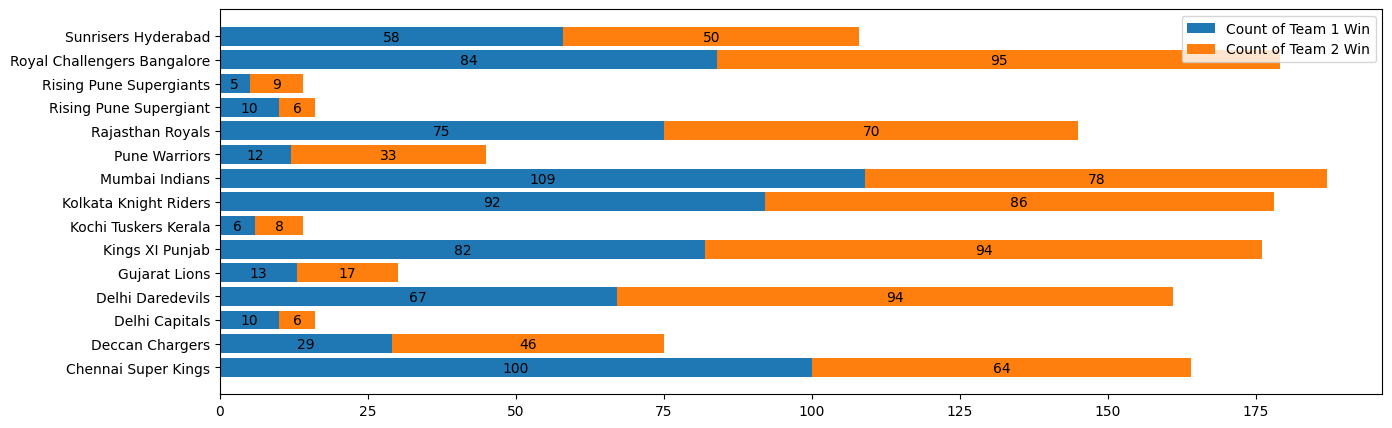

In [163]:
plt.figure(figsize = (15, 5))
graph = plt.barh(winData['team'], winData['winn_count'])

i=0;
for p in graph:
  width = p.get_width();
  height = p.get_height();
  x, y = p.get_xy()
  plt.text(x + width/2, y+height/4, winData.loc[i, 'winn_count'], ha="center")
  i+=1;


graph = plt.barh(winData['team'], winData['loss_count'], left=winData['winn_count'])

i=0;
for p in graph:
  width = p.get_width();
  height = p.get_height();
  x, y = p.get_xy()
  plt.text(x + width/2, y+height/4, winData.loc[i, 'loss_count'], ha="center")
  i+=1;


plt.legend(['Count of Team 1 Win', 'Count of Team 2 Win'])
plt.show()

**Q4 Redo**

In [164]:
matches[['team1', 'winner']].head(5)

,team1,winner
0,Sunrisers Hyderabad,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab
4,Royal Challengers Bangalore,Royal Challengers Bangalore


In [166]:
def isTeamAWinner(team1, winner):
  if(team1 == winner):
    return "Yes"
  else:
    return "No"


matches['flag'] = matches.apply(lambda x: isTeamAWinner(x.team1, x.winner), axis=1)    #make a column for lost team
team1df = matches[['team1', 'winner', 'flag']]

filterTeam1Win = (team1df['flag'] == 'Yes')

filteredTeam1Data = team1df[filterTeam1Win]
totalData = filteredTeam1Data.groupby('team1').size().reset_index()
totalData.columns = ['teamname', 'team1']
print(totalData.head())

def isTeamBWinner(team2, winner):
  if(team2 == winner):
    return "Yes"
  else:
    return "No"

matches['flag'] = matches.apply(lambda x: isTeamBWinner(x.team2, x.winner), axis = 1)
team2df = matches[['team2', 'winner', 'flag']]

filterTeam2Win = (team2df['flag'] == 'Yes')

filteredTeam2Data = team2df[filterTeam2Win]
totalData2 = filteredTeam2Data.groupby('team2').size().reset_index()
totalData2.columns = ['teamname', 'team2']

print(totalData2.head())


#merge the totalData and totalData2
mergedData = totalData.merge(totalData2)
print(len(totalData), len(totalData2), len(mergedData))

              teamname  team1
0  Chennai Super Kings     51
1      Deccan Chargers     18
2       Delhi Capitals      3
3     Delhi Daredevils     25
4        Gujarat Lions      1
              teamname  team2
0  Chennai Super Kings     49
1      Deccan Chargers     11
2       Delhi Capitals      7
3     Delhi Daredevils     42
4        Gujarat Lions     12
14 15 14


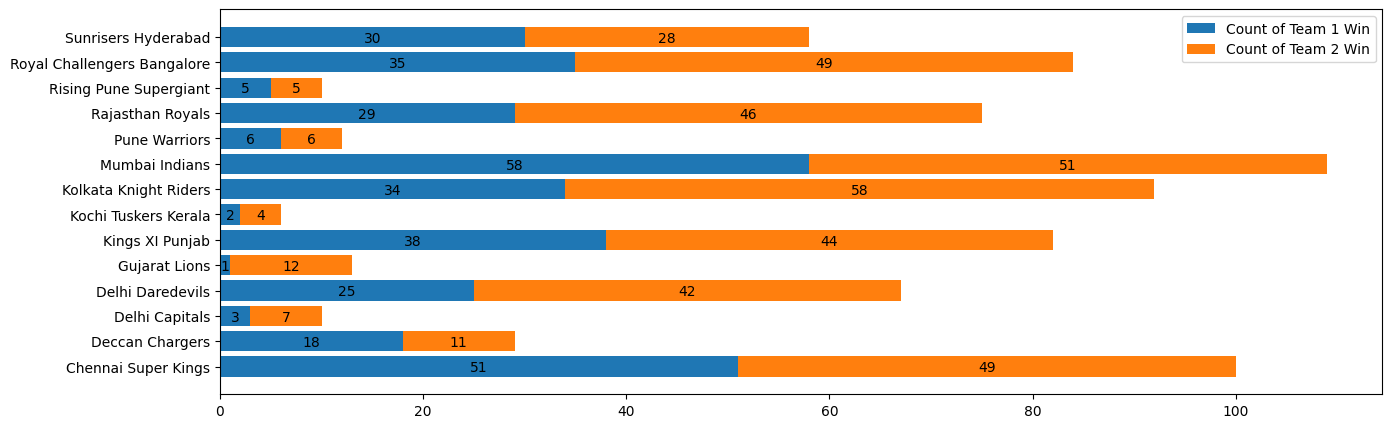

In [167]:
plt.figure(figsize = (15, 5))
graph = plt.barh(mergedData['teamname'], mergedData['team1'])

i=0;
for p in graph:
  width = p.get_width();
  height = p.get_height();
  x, y = p.get_xy()
  plt.text(x + width/2, y+height/4, mergedData.loc[i, 'team1'], ha="center")
  i+=1;


graph = plt.barh(mergedData['teamname'], mergedData['team2'], left=mergedData['team1'])

i=0;
for p in graph:
  width = p.get_width();
  height = p.get_height();
  x, y = p.get_xy()
  plt.text(x + width/2, y+height/4, mergedData.loc[i, 'team2'], ha="center")
  i+=1;


plt.legend(['Count of Team 1 Win', 'Count of Team 2 Win'])
plt.show()

**Q5 Toss Decision**

In [168]:
tossDf = matches[['Season', 'toss_decision']]
tossDf.head(5)

,Season,toss_decision
0,IPL-2017,field
1,IPL-2017,field
2,IPL-2017,field
3,IPL-2017,field
4,IPL-2017,bat


In [169]:
groupedTossedData = tossDf.groupby(['Season', 'toss_decision']).size().reset_index();
groupedTossedData.columns = ['Season', 'toss_decision', 'count']

filt1 = (groupedTossedData['toss_decision'] == 'bat')
filt2 = (groupedTossedData['toss_decision'] == 'field')

print(len(filt1), len(filt2))

totalData = groupedTossedData[filt1].reset_index()
totalData.columns = ['index' ,'Season', 'bat_toss_decision', 'bat_toss_count']
totalData = totalData[['Season', 'bat_toss_count']]

filteredData = groupedTossedData[filt2].reset_index()
filteredData.columns = ['index', 'Season', 'field_toss_decision', 'field_toss_count']
filteredData = filteredData[['Season', 'field_toss_count']]

print(len(totalData), len(filteredData))

totalData = totalData.merge(filteredData)

24 24
12 12


<ipython-input-170-545e9ac41f56>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(totalData['Season'], totalData['bat_toss_count'], 'go-', linewidth=2, color='blue')
<ipython-input-170-545e9ac41f56>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(totalData['Season'], totalData['field_toss_count'], 'go-', linewidth=2, color='orange')


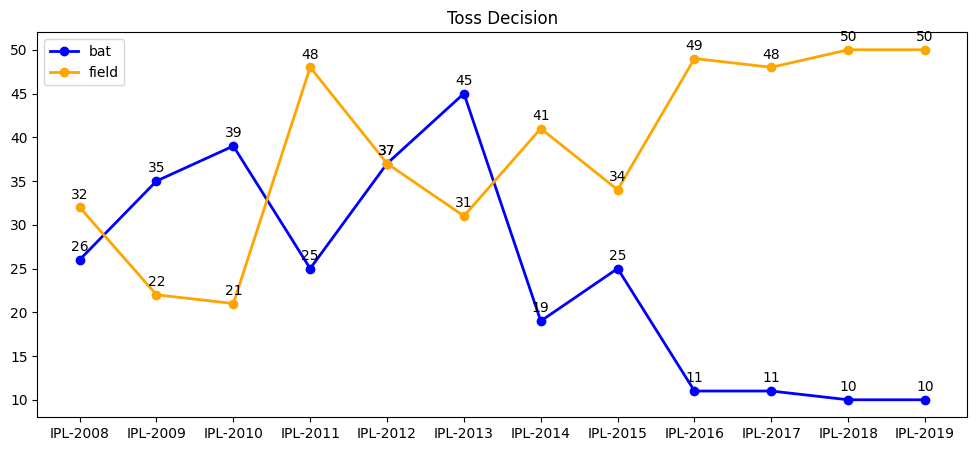

In [170]:
# ax = plt.figure().add_subplot(111)
fig = plt.figure(figsize = (12, 5))
plt.plot(totalData['Season'], totalData['bat_toss_count'], 'go-', linewidth=2, color='blue')
plt.plot(totalData['Season'], totalData['field_toss_count'], 'go-', linewidth=2, color='orange')
plt.title("Toss Decision")

for i, v in enumerate(totalData['bat_toss_count']):
    plt.text(i, v+1, "%d" %v, ha="center")

for i, v in enumerate(totalData['field_toss_count']):
    plt.text(i, v+1, "%d" %v, ha="center")

plt.legend(['bat', 'field'])

plt.show()

**Q6 Boundaries Count**

In [171]:
boundariesDf = deliveries[['batting_team', 'total_runs']]

fourFilter = (boundariesDf['total_runs'] == 4)
filteredFour = boundariesDf[fourFilter]

sixFilter = (boundariesDf['total_runs'] == 6)
filteredSix = boundariesDf[sixFilter]

boundariesFour = filteredFour.groupby('batting_team').size().reset_index()
boundariesFour.columns = ['team', 'fours']

boundariesSix = filteredSix.groupby('batting_team').size().reset_index()
boundariesSix.columns = ['team', 'six']

print(len(boundariesFour), len(boundariesSix))
boundaries = boundariesFour.merge(boundariesSix)

print(boundaries.head(5))

15 15
                  team  fours  six
0  Chennai Super Kings   2215  972
1      Deccan Chargers    966  397
2       Delhi Capitals    238   88
3     Delhi Daredevils   2179  798
4        Gujarat Lions    460  155


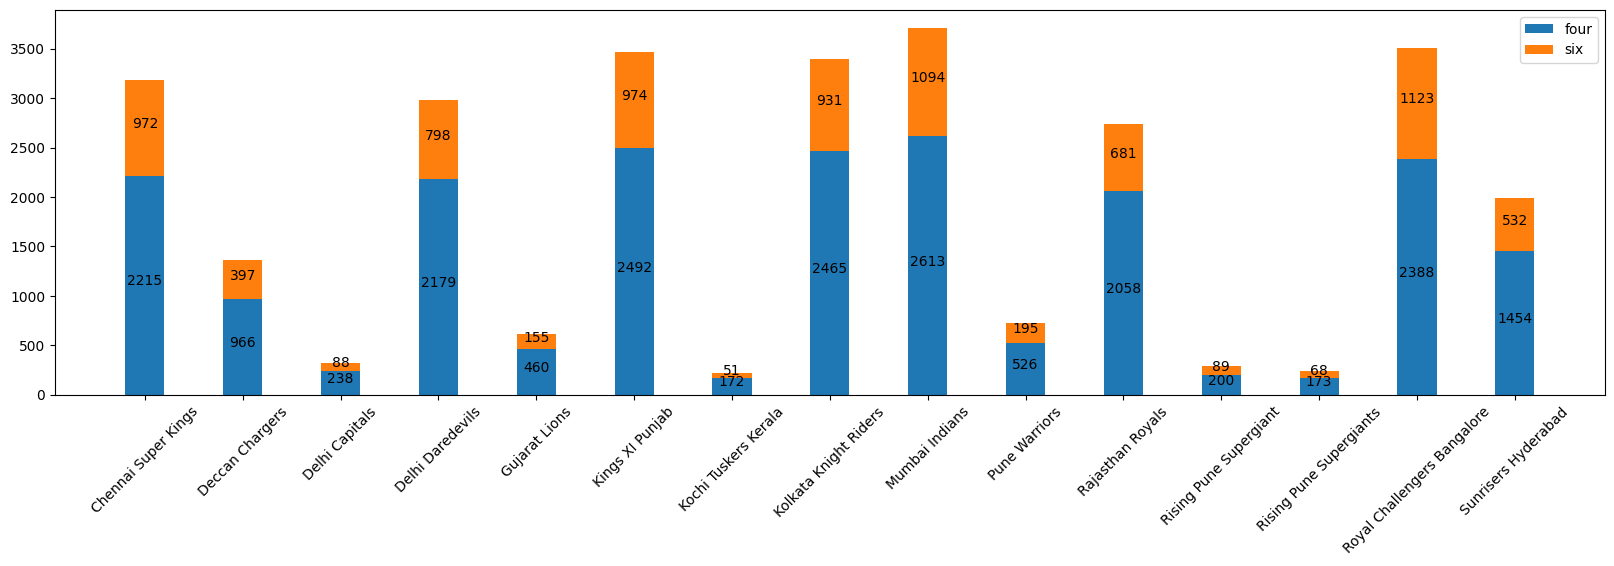

In [172]:
fig = plt.figure(figsize = (20, 5))
# plt.axes().set_facecolor("dimgray")
graph = plt.bar(boundaries['team'], boundaries['fours'], width=0.4)

i = 0
for p in graph:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x + (width/2), y + (height/2), boundaries.loc[i, 'fours'], ha='center', color='black')
  i+=1;


graph = plt.bar(boundaries['team'], boundaries['six'], bottom=boundaries['fours'], width=0.4)

i = 0
for p in graph:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x + (width/2), y + (height/2), boundaries.loc[i, 'six'], ha='center', color='black')
  i+=1;

plt.xticks(rotation=45)

plt.legend(['four', 'six'])
plt.show()